In [62]:
import pandas as pd

# Load the datasets directly from your GitHub repository
global_url = "https://raw.githubusercontent.com/cheribeda/Data-Presentation/main/all-weeks-global-netflix.xlsx"
popular_url = "https://raw.githubusercontent.com/cheribeda/Data-Presentation/main/most-popular-netflix.xlsx"
countries_url = "https://raw.githubusercontent.com/cheribeda/Data-Presentation/main/all-weeks-countries-netflix.xlsx"

# Read the data
global_netflix = pd.read_excel(global_url)
most_popular_netflix = pd.read_excel(popular_url)
countries_netflix = pd.read_excel(countries_url)

# Display a preview of the data
print("Global Netflix Data:")
print(global_netflix.head())
print("\nMost Popular Netflix Data:")
print(most_popular_netflix.head())
print("\nCountries Netflix Data:")
print(countries_netflix.head())


Global Netflix Data:
         week         category  weekly_rank                     show_title  \
0  2024-04-14  Films (English)            1              What Jennifer Did   
1  2024-04-14  Films (English)            2  Woody Woodpecker Goes to Camp   
2  2024-04-14  Films (English)            3                          Scoop   
3  2024-04-14  Films (English)            4                          Glass   
4  2024-04-14  Films (English)            5                   Megan Leavey   

  season_title  weekly_hours_viewed  runtime  weekly_views  \
0          NaN             26100000   1.4500    18000000.0   
1          NaN             19600000   1.6667    11800000.0   
2          NaN             14600000   1.7167     8500000.0   
3          NaN             11000000   2.1500     5100000.0   
4          NaN              9700000   1.9333     5000000.0   

   cumulative_weeks_in_top_10  is_staggered_launch episode_launch_details  
0                           1                False           

In [57]:
# Define keywords for filtering horror movies
horror_keywords = ['horror', 'haunt', 'fear', 'scary', 'terror', 'nightmare', '13', 'ghost', 'paranormal', 'Halloween']

# Filter each dataset
global_horror = global_netflix[global_netflix['show_title'].str.contains('|'.join(horror_keywords), case=False, na=False)]
popular_horror = most_popular_netflix[most_popular_netflix['show_title'].str.contains('|'.join(horror_keywords), case=False, na=False)]
countries_horror = countries_netflix[countries_netflix['show_title'].str.contains('|'.join(horror_keywords), case=False, na=False)]

# Summarize global horror data
global_horror_summary = global_horror.groupby('show_title').agg({
    'weekly_hours_viewed': 'sum',
    'weekly_views': 'sum',
    'cumulative_weeks_in_top_10': 'max'
}).reset_index().sort_values(by='weekly_hours_viewed', ascending=False)

# Summarize popular horror data
popular_horror_summary = popular_horror[['show_title', 'hours_viewed_first_91_days', 'views_first_91_days']]

# Summarize country horror data
countries_horror_summary = countries_horror.groupby('country_name').agg({
    'weekly_rank': 'count',
    'cumulative_weeks_in_top_10': 'sum'
}).reset_index().rename(columns={
    'weekly_rank': 'horror_movies_count',
    'cumulative_weeks_in_top_10': 'total_weeks_in_top_10'
}).sort_values(by='horror_movies_count', ascending=False)

# Display summaries using print
print("Global Horror Summary:")
print(global_horror_summary)

print("\nPopular Horror Movies Summary:")
print(popular_horror_summary)

print("\nCountries Horror Summary:")
print(countries_horror_summary)


Global Horror Summary:
                                   show_title  weekly_hours_viewed  \
22                            We Have a Ghost            105980000   
3                          American Nightmare            101600000   
21  Turning Point: 9/11 and the War on Terror             80680000   
6                    Fear Street Part 1: 1994             66350000   
19                          The Wages of Fear             62000000   
7                    Fear Street Part 2: 1978             47820000   
8                    Fear Street Part 3: 1666             38620000   
0   13 Hours: The Secret Soldiers of Benghazi             36150000   
13       Jimmy Savile: A British Horror Story             29110000   
1                             28 Days Haunted             26650000   
16                      Sniper: Ghost Shooter             17880000   
9                                Ghost Doctor             17520000   
5                                   Deep Fear             16900000 

In [66]:
# Manually refine the list of valid horror movies (based on validation)
valid_horror_titles = [
    "Fear Street Part 1: 1994",
    "Fear Street Part 2: 1978",
    "Fear Street Part 3: 1666",
    "A Classic Horror Story",
    "28 Days Haunted",
    "Deep Fear",
    "Scary Movie",
    "Goosebumps 2: Haunted Halloween",
]

# Filter Global Horror Data using the valid titles
global_horror_refined = global_horror[global_horror['show_title'].isin(valid_horror_titles)]

# Summarize the refined data
global_horror_refined_summary = global_horror_refined.groupby('show_title').agg({
    'weekly_hours_viewed': 'sum',
    'weekly_views': 'sum',
    'cumulative_weeks_in_top_10': 'max'
}).reset_index().sort_values(by='weekly_hours_viewed', ascending=False)

# Display refined summary
print("Refined Global Horror Summary:")
print(global_horror_refined_summary)


Refined Global Horror Summary:
                        show_title  weekly_hours_viewed  weekly_views  \
3         Fear Street Part 1: 1994             66350000           0.0   
4         Fear Street Part 2: 1978             47820000           0.0   
5         Fear Street Part 3: 1666             38620000           0.0   
0                  28 Days Haunted             26650000           0.0   
2                        Deep Fear             16900000    11900000.0   
1           A Classic Horror Story             13150000           0.0   
6  Goosebumps 2: Haunted Halloween              7680000           0.0   
7                      Scary Movie              5400000     3700000.0   

   cumulative_weeks_in_top_10  
3                           5  
4                           4  
5                           3  
0                           2  
2                           2  
1                           2  
6                           1  
7                           1  


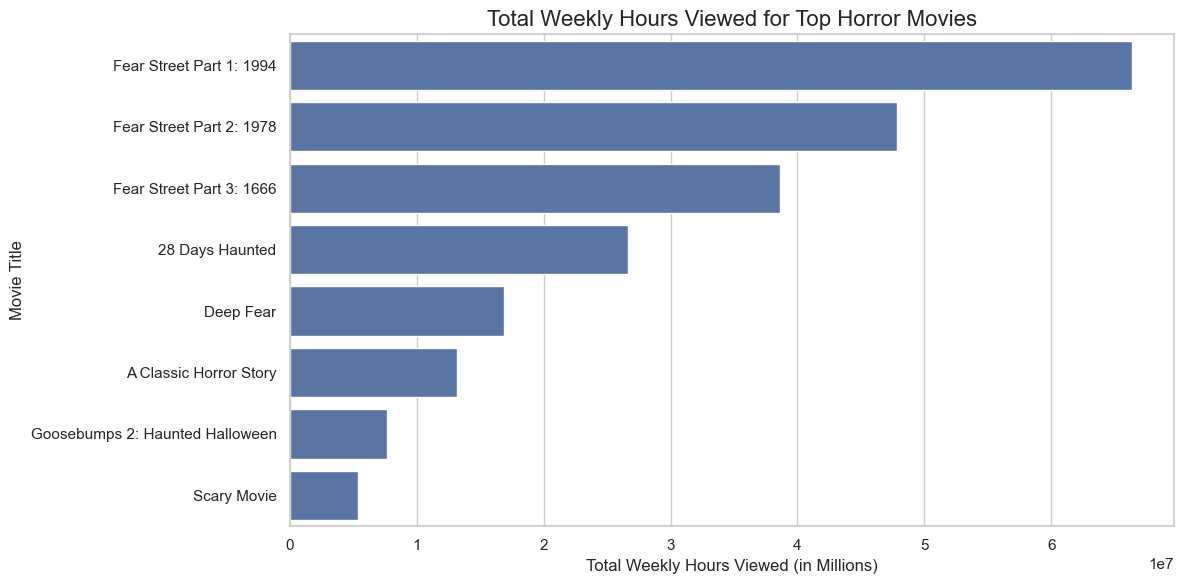

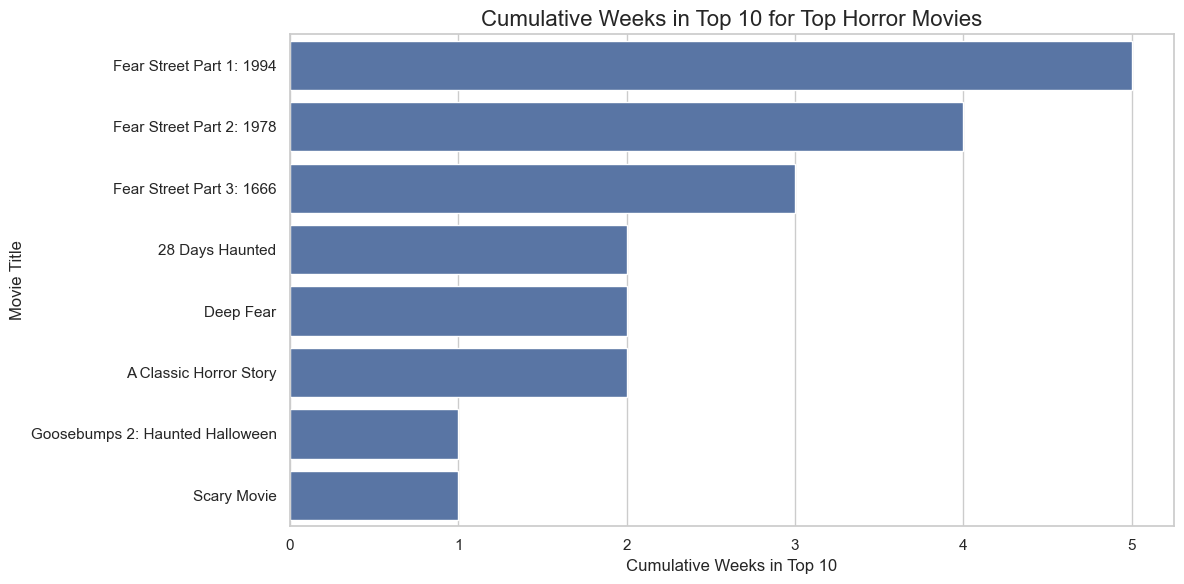

In [68]:
# Visualization 1: Weekly Hours Viewed
plt.figure(figsize=(12, 6))
sns.barplot(data=global_horror_refined_summary, x='weekly_hours_viewed', y='show_title')
plt.title("Total Weekly Hours Viewed for Top Horror Movies", fontsize=16)
plt.xlabel("Total Weekly Hours Viewed (in Millions)", fontsize=12)
plt.ylabel("Movie Title", fontsize=12)
plt.tight_layout()
plt.show()


# Visualization 3: Cumulative Weeks in Top 10
plt.figure(figsize=(12, 6))
sns.barplot(data=global_horror_refined_summary, x='cumulative_weeks_in_top_10', y='show_title')
plt.title("Cumulative Weeks in Top 10 for Top Horror Movies", fontsize=16)
plt.xlabel("Cumulative Weeks in Top 10", fontsize=12)
plt.ylabel("Movie Title", fontsize=12)
plt.tight_layout()
plt.show()


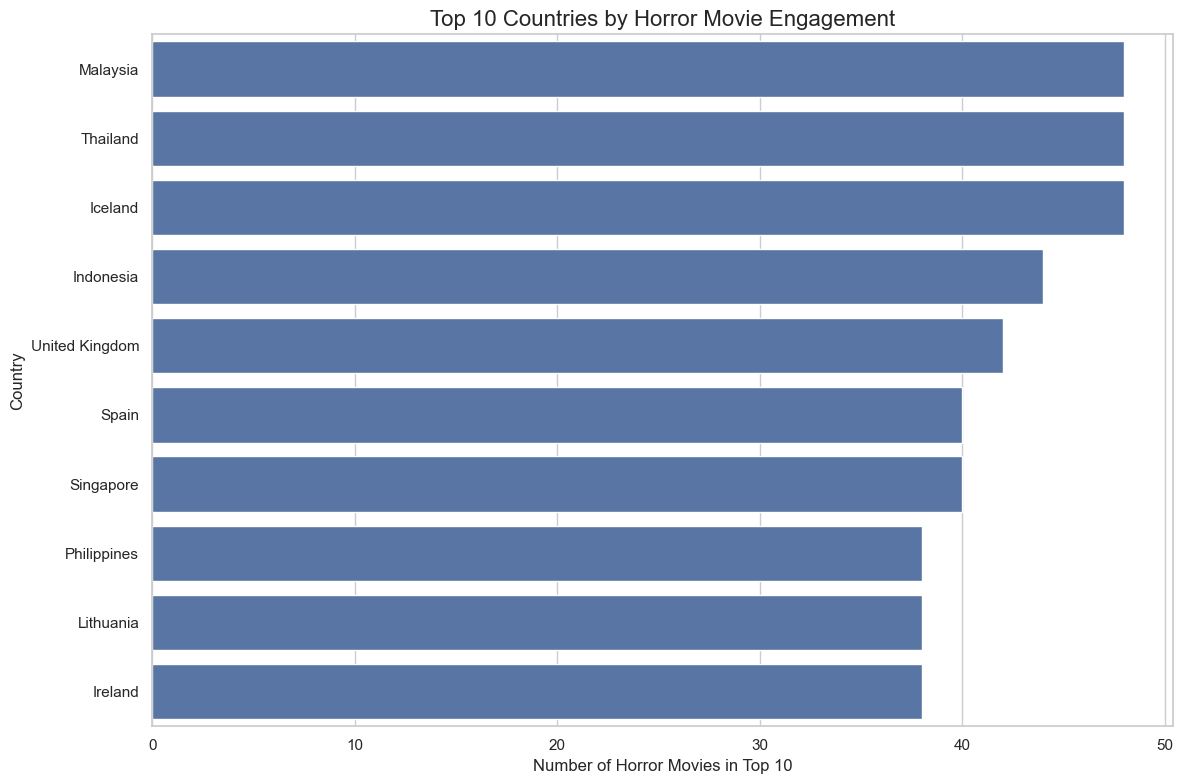

In [74]:
plt.figure(figsize=(12, 8))  # Figure size for top 10
top_10_countries = countries_horror_summary.head(10)  # Select the top 10 countries
sns.barplot(data=top_10_countries, x='horror_movies_count', y='country_name')
plt.title("Top 10 Countries by Horror Movie Engagement", fontsize=16)
plt.xlabel("Number of Horror Movies in Top 10", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()



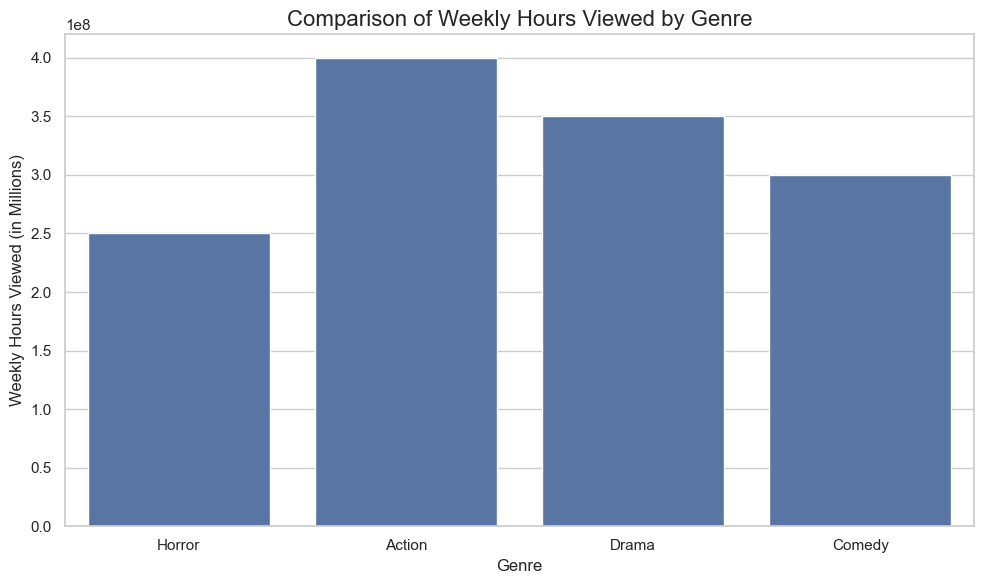

In [24]:
# Genre Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df, x="Genre", y="Weekly Hours Viewed")
plt.title("Comparison of Weekly Hours Viewed by Genre", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Weekly Hours Viewed (in Millions)", fontsize=12)
plt.tight_layout()
plt.show()



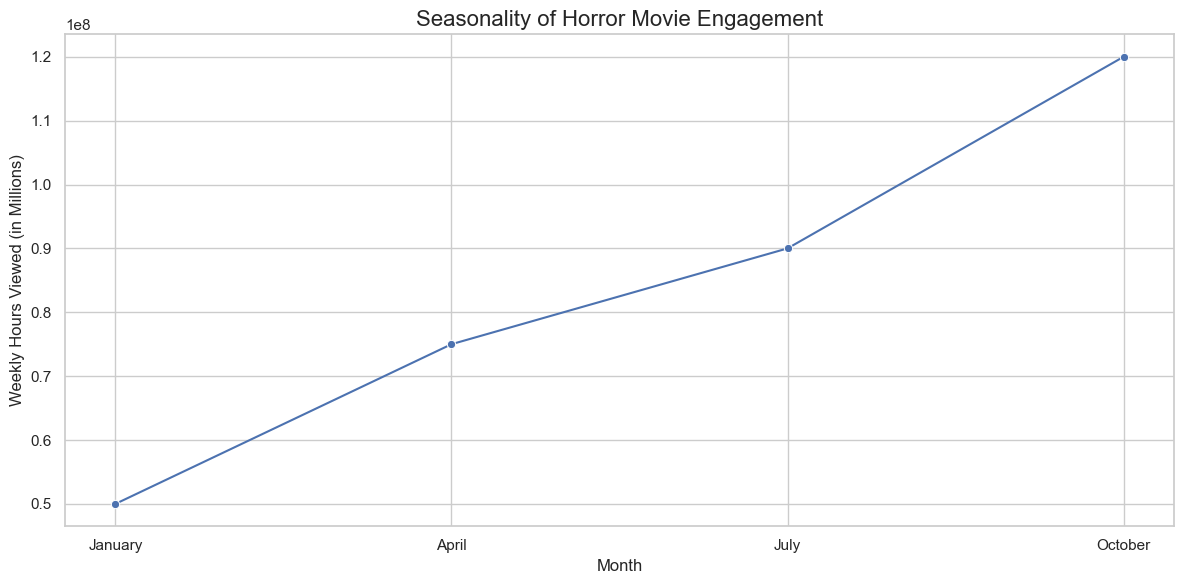

In [26]:
# Mock seasonality data
season_data = {
    "Month": ["January", "April", "July", "October"],
    "Weekly Hours Viewed": [50_000_000, 75_000_000, 90_000_000, 120_000_000]
}

season_df = pd.DataFrame(season_data)

plt.figure(figsize=(12, 6))
sns.lineplot(data=season_df, x="Month", y="Weekly Hours Viewed", marker="o")
plt.title("Seasonality of Horror Movie Engagement", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Weekly Hours Viewed (in Millions)", fontsize=12)
plt.tight_layout()
plt.show()


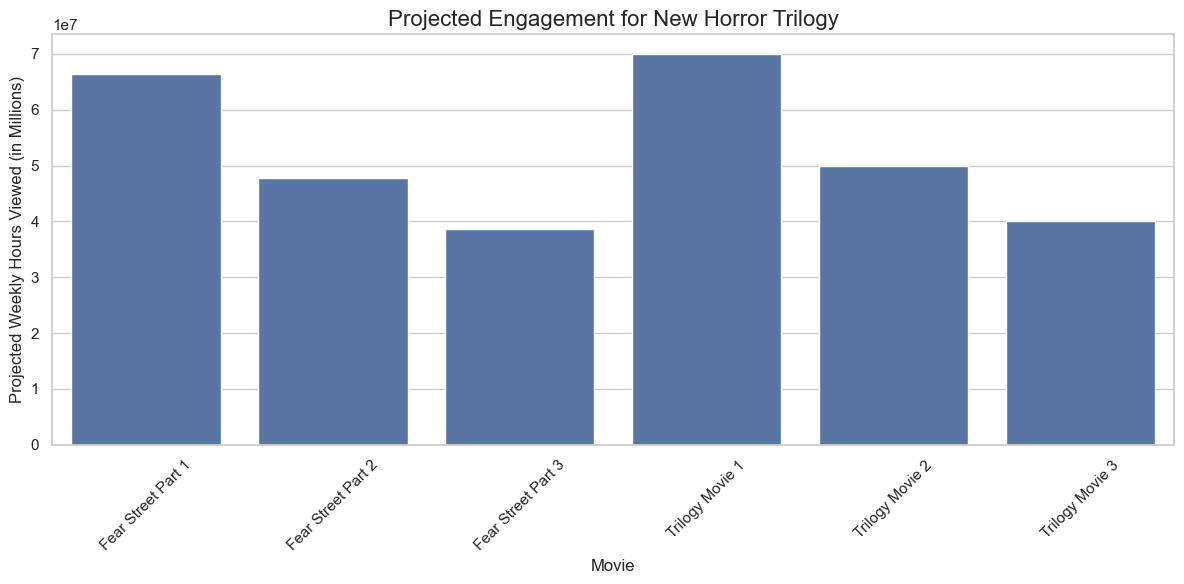

In [36]:
# Projected Trilogy Engagement 
plt.figure(figsize=(12, 6))
sns.barplot(data=trilogy_df, x="Movie", y="Projected Weekly Hours Viewed")
plt.title("Projected Engagement for New Horror Trilogy", fontsize=16)
plt.xlabel("Movie", fontsize=12)
plt.ylabel("Projected Weekly Hours Viewed (in Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


